In [ ]:
<h2 style='color:blue' align='center'>Implementation of stochastic and batch grandient descent in python</h2>

**We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample**

##### Load the dataset in pandas dataframe

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('homeprices_banglore.csv')

In [4]:
df.sample(5)

,area,bedrooms,price
11,2785,4,140.0
7,3300,4,155.0
6,2732,4,135.0
4,1200,2,51.0
5,1170,2,38.0


##### Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [5]:
from sklearn import preprocessing

In [6]:
df.shape[0]

20

In [7]:
X = df[["area", "bedrooms"]]
y = df.price

In [8]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()


scaled_X = sx.fit_transform(X)
scaled_y = sy.fit_transform(y.values.reshape(df.shape[0], 1))

##### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [25]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

##### Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

<img src="hp.jpg"/>

In [10]:
import numpy as np
w = np.ones(shape = X.shape[1])

In [11]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [12]:
np.dot(w, scaled_X.T) # it gives this: w1 * area + w2 * bedroom

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

**Now is the time to implement mini batch gradient descent.**

In [14]:
def batch_gradient_descend(X, y_test, epochs, learning_rate = 0.01):

  number_of_features = X.shape[1]

  #initiliaze w1, w2, bias some random values

  w =  np.ones(shape = (number_of_features)) #w1, w2 = 1
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  # go through epochs one by one. this is my each iteration. Every iteration i use all training samples to perform training.

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T) + b  # w1 * area + w2 * bedroom, np vector process: fast, if for loop is to be used: long

    # calculating derivative of error with respect to w1 and w2
    w_grad = -(2/total_samples)*(X.T.dot(y_test - y_predicted))
    b_grad = -(2/total_samples)*(np.sum(y_test - y_predicted))

    #adjusting weights
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_test-y_predicted))

    if i % 10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list  = batch_gradient_descend(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)

w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

###### Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,
w1 = 0.66469087
w2 = 0.60541671
bias = -0.17792104056392882

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

In [15]:
import matplotlib.pyplot as plt

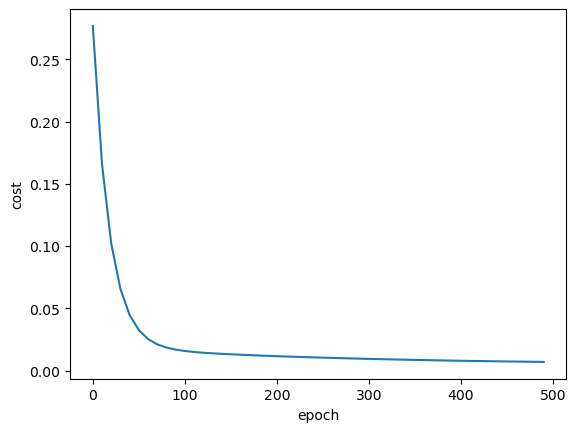

In [16]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)


In [17]:
sx.transform([[2600,4]])

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

###### Lets do some predictions now. 

In [18]:
def predict(area, bedrooms, w,b):
  scaled_X = sx.transform([[area, bedrooms]])[0]

  scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]
  pass

predict(2600, 4,w,b)

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [19]:
predict(1000, 2, w,b)

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [20]:
X.shape

(20, 2)

<h3 style='color:purple'>(2) Stochastic Gradient Descent Implementation</h3>

#### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [27]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

3

In [22]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs): # instead of all samples, we'll use a randomly picked sample.
        random_index = np.random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index] # these are just one data point
                                        # you take 1 sample from X, 1 sample from y
                                        # use it rest of the code

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.72379855, 0.70441766]), -0.2613880122262888, 0.0022857121602644567)

Compare this with weights and bias that we got using gradient descent. They both of quite similar.

In [28]:
w , b 

(array([0.70712464, 0.67456527]), -0.23034857438407427)

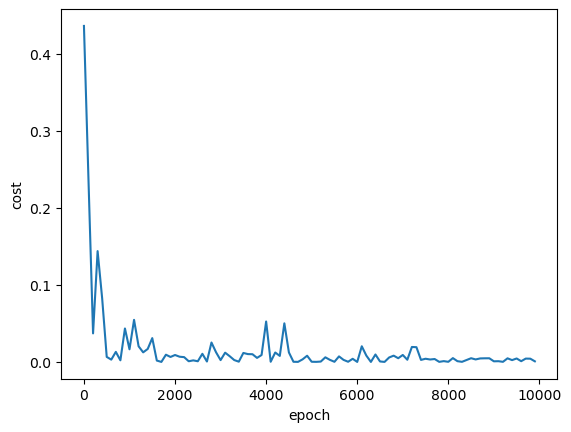

In [23]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [24]:
predict(2600, 4, w_sgd, b_sgd)

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.68423315983142